In [280]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
np.set_printoptions(suppress=True)
df = pd.read_csv('data/covid_19_data.csv')

In [281]:
# I referred code regarding data preprocessing from https://www.kaggle.com/chirag9073/coronavirus-covid-19-outbreak-data-analysis

df.drop(['SNo'], axis=1, inplace=True)
df['ObservationDate'] = df['ObservationDate'].apply(pd.to_datetime)

In [282]:
df.head(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.000,0.000,0.000
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.000,0.000,0.000
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.000,0.000,0.000
5,2020-01-22,Guangdong,Mainland China,1/22/2020 17:00,26.000,0.000,0.000
6,2020-01-22,Guangxi,Mainland China,1/22/2020 17:00,2.000,0.000,0.000
7,2020-01-22,Guizhou,Mainland China,1/22/2020 17:00,1.000,0.000,0.000
8,2020-01-22,Hainan,Mainland China,1/22/2020 17:00,4.000,0.000,0.000
9,2020-01-22,Hebei,Mainland China,1/22/2020 17:00,1.000,0.000,0.000


In [283]:
df.isnull().sum()

ObservationDate       0
Province/State     1398
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [284]:
df[df['Province/State'].isnull()].head(10)

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,2020-01-22,NaN,Japan,1/22/2020 17:00,2.000,0.000,0.000
36,2020-01-22,NaN,Thailand,1/22/2020 17:00,2.000,0.000,0.000
37,2020-01-22,NaN,South Korea,1/22/2020 17:00,1.000,0.000,0.000
73,2020-01-23,NaN,Japan,1/23/20 17:00,1.000,0.000,0.000
74,2020-01-23,NaN,Thailand,1/23/20 17:00,3.000,0.000,0.000
75,2020-01-23,NaN,South Korea,1/23/20 17:00,1.000,0.000,0.000
76,2020-01-23,NaN,Singapore,1/23/20 17:00,1.000,0.000,0.000
77,2020-01-23,NaN,Philippines,1/23/20 17:00,0.000,0.000,0.000
78,2020-01-23,NaN,Malaysia,1/23/20 17:00,0.000,0.000,0.000
79,2020-01-23,NaN,Vietnam,1/23/20 17:00,2.000,0.000,0.000


In [285]:
# Current situation
grouped_df = df.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
grouped_df.style.background_gradient(cmap='Pastel1_r')

In [286]:
# Top 10 Countries with most no. of reported cases
latest_df = df[df['ObservationDate'] == max(df['ObservationDate'])].reset_index()
grouped_df = latest_df.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()

temp = grouped_df[['Country/Region', 'Confirmed']]
temp = temp.sort_values(by='Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.head(10).style.background_gradient(cmap='Pastel1_r')

,Country/Region,Confirmed
0,Mainland China,80652
1,South Korea,7041
2,Italy,5883
3,Iran,5823
4,France,949
5,Germany,799
6,Others,696
7,Spain,500
8,Japan,461
9,US,417


In [287]:
# Countries with all the cases recovered
temp = grouped_df[grouped_df['Confirmed']==grouped_df['Recovered']]
temp = temp[['Country/Region', 'Confirmed', 'Recovered']]
temp = temp.sort_values('Confirmed', ascending=False)
temp = temp.reset_index(drop=True)
temp.style.background_gradient(cmap='Greens')

,Country/Region,Confirmed,Recovered
0,Macau,10,10
1,Cambodia,1,1
2,Nepal,1,1
3,Sri Lanka,1,1


In [288]:
# Most recent stats
world_daily_df = df.groupby('ObservationDate')['Confirmed', 'Deaths', 'Recovered'].sum()
world_daily_df = world_daily_df.reset_index()
world_daily_df = world_daily_df.sort_values('ObservationDate', ascending=False)
world_daily_df.head(1).style.background_gradient(cmap='Pastel1')

,ObservationDate,Confirmed,Deaths,Recovered
45,2020-03-07 00:00:00,105836,3558,58359


In [289]:
world_daily_df.style.background_gradient(cmap='Pastel1')

,ObservationDate,Confirmed,Deaths,Recovered
45,2020-03-07 00:00:00,105836,3558,58359
44,2020-03-06 00:00:00,101800,3460,55866
43,2020-03-05 00:00:00,97886,3348,53797
42,2020-03-04 00:00:00,95124,3254,51171
41,2020-03-03 00:00:00,92844,3160,48229
40,2020-03-02 00:00:00,90309,3085,45602
39,2020-03-01 00:00:00,88371,2996,42716
38,2020-02-29 00:00:00,86013,2941,39782
37,2020-02-28 00:00:00,84124,2872,36711
36,2020-02-27 00:00:00,82756,2814,33277


In [290]:
world_daily_df.isnull().sum()

ObservationDate    0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [291]:
# from https://tykimos.github.io/2017/04/09/RNN_Layer_Talk/
import keras

class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        self.val_losses = []
        
    def on_epoch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))

In [292]:

import datetime
import os
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

WINDOW_SIZE = 20

class PandemicRegressor():
    def __init__(self, window_size, batch_size, n_feature, model_name, type='linear'):
        self.window_size = window_size
        self.n_feature = n_feature
        save_dir = os.path.join(os.path.join(os.getcwd(), 'model'), 
                                datetime.datetime.now().strftime('%Y-%m-%d;%H.%M.%S'))
        os.mkdir(save_dir)
        self.model_path = os.path.join(save_dir, model_name + '.best.hdf5')
        print(self.model_path)
    
        self.reg = self.build_model(type)
        
    def build_model(self, type):
        if type == 'linear'
            model = SVC(kernel='linear', C=1e10)
            
        return model

    def fit(self, X, y):
        return self.reg.fit(X,y)
    
    def predict_n_days(self, n, seq_in, scaler):
        _mean = scaler['mean']
        _std = scaler['std']
        
        if self.hidden_state:
            seq_in = list(seq_in)
            seq_out = []
            for i in range(n):
                temp = np.array(seq_in)
                temp = np.reshape(temp, (1, self.window_size, self.n_feature)) # n_sample, seq_len, n_feature
                y_hat = self.reg.predict(temp)
                seq_out.append(y_hat[0])
                y_hat = (y_hat - _mean) / _std
                seq_in.append(y_hat[0])
                seq_in.pop(0)
        else:
            seq_in = list(seq_in)
            seq_out = []
            for i in range(n):
                temp = np.array(seq_in)
                temp = np.reshape(temp, (1, self.window_size * self.n_feature)) # n_sample, seq_len, n_feature
                y_hat = self.reg.predict(temp)
                seq_out.append(y_hat[0])
                y_hat = (y_hat - _mean) / _std
                seq_in.append(y_hat[0])
                seq_in.pop(0)
        seq_out.reverse()
        _df = pd.DataFrame(seq_out)
        _df.columns = ['Confirmed', 'Deaths', 'Recovered']
        return _df
    
    def predict(self, X):
        return self.reg.predict(X)
    
    def evaluate(self, X_test, y_test):
        loss_and_metrics = self.reg.evaluate(X_test, 
                                             y_test, 
                                             batch_size=self.batch_size)
        return loss_and_metrics
    
    def load_best_weights(self):
        self.reg.load_weights(self.model_path)
    
    def save(self):
        self.reg.save(self.model_path)


In [293]:
res_dir = os.path.join(os.path.join(os.getcwd(), 'result'), 
                                datetime.datetime.now().strftime('%Y-%m-%d;%H.%M.%S'))
os.mkdir(res_dir)

In [294]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def show_train_hist(hist):
    plt.plot(hist.history['loss'], 'b-', label='train_loss')
    plt.plot(hist.history['val_loss'], 'r', label='val_loss')
    plt.title("loss history")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Normalize
_mean = np.mean(world_daily_df[['Confirmed', 'Deaths', 'Recovered']].values, axis=0)
_std = np.std(world_daily_df[['Confirmed', 'Deaths', 'Recovered']].values, axis=0)

print(_mean)
print(_std)

[51797.04347826  1535.82608696 16029.95652174]
[34371.13080388  1184.01263772 18420.92444803]


In [295]:
def seq2dataset(sr, window_size):
        seq_data = []
        for i in range(len(sr) - window_size):
            subset = list(sr[i:(i+window_size+1)])
            subset.reverse()
            seq_data.append(subset)
        seq_data.reverse()
        seq_data = np.array(seq_data)
        return seq_data[:,0:window_size,:], seq_data[:,window_size,:]

In [296]:
X, y = seq2dataset(world_daily_df[['Confirmed', 'Deaths', 'Recovered']].values, WINDOW_SIZE)
X

array([[[   555.,     17.,     28.],
        [   653.,     18.,     30.],
        [   941.,     26.,     36.],
        ...,
        [ 37121.,    806.,   2616.],
        [ 40151.,    906.,   3244.],
        [ 42763.,   1013.,   3946.]],

       [[   653.,     18.,     30.],
        [   941.,     26.,     36.],
        [  1438.,     42.,     39.],
        ...,
        [ 40151.,    906.,   3244.],
        [ 42763.,   1013.,   3946.],
        [ 44803.,   1113.,   4683.]],

       [[   941.,     26.,     36.],
        [  1438.,     42.,     39.],
        [  2118.,     56.,     52.],
        ...,
        [ 42763.,   1013.,   3946.],
        [ 44803.,   1113.,   4683.],
        [ 45222.,   1118.,   5150.]],

       ...,

       [[ 66887.,   1523.,   8058.],
        [ 69032.,   1666.,   9395.],
        [ 71226.,   1770.,  10865.],
        ...,
        [ 90309.,   3085.,  45602.],
        [ 92844.,   3160.,  48229.],
        [ 95124.,   3254.,  51171.]],

       [[ 69032.,   1666.,   9395.],
  

In [297]:
y

array([[ 44803.,   1113.,   4683.],
       [ 45222.,   1118.,   5150.],
       [ 60370.,   1371.,   6295.],
       [ 66887.,   1523.,   8058.],
       [ 69032.,   1666.,   9395.],
       [ 71226.,   1770.,  10865.],
       [ 73260.,   1868.,  12583.],
       [ 75138.,   2007.,  14352.],
       [ 75641.,   2122.,  16121.],
       [ 76199.,   2247.,  18177.],
       [ 76843.,   2251.,  18890.],
       [ 78599.,   2458.,  22886.],
       [ 78985.,   2469.,  23394.],
       [ 79570.,   2629.,  25227.],
       [ 80415.,   2708.,  27905.],
       [ 81397.,   2770.,  30384.],
       [ 82756.,   2814.,  33277.],
       [ 84124.,   2872.,  36711.],
       [ 86013.,   2941.,  39782.],
       [ 88371.,   2996.,  42716.],
       [ 90309.,   3085.,  45602.],
       [ 92844.,   3160.,  48229.],
       [ 95124.,   3254.,  51171.],
       [ 97886.,   3348.,  53797.],
       [101800.,   3460.,  55866.],
       [105836.,   3558.,  58359.]])

In [298]:
X = (X - _mean) / _std

In [299]:
X

array([[[-1.49084544, -1.28277861, -0.86868368],
        [-1.48799421, -1.28193403, -0.86857511],
        [-1.47961508, -1.27517734, -0.8682494 ],
        ...,
        [-0.42698751, -0.61640059, -0.72819128],
        [-0.33883213, -0.53194203, -0.69409961],
        [-0.26283812, -0.44157137, -0.65599078]],

       [[-1.48799421, -1.28193403, -0.86857511],
        [-1.47961508, -1.27517734, -0.8682494 ],
        [-1.46515527, -1.26166397, -0.86808654],
        ...,
        [-0.33883213, -0.53194203, -0.69409961],
        [-0.26283812, -0.44157137, -0.65599078],
        [-0.20348599, -0.35711282, -0.61598193]],

       [[-1.47961508, -1.27517734, -0.8682494 ],
        [-1.46515527, -1.26166397, -0.86808654],
        [-1.44537123, -1.24983977, -0.86738082],
        ...,
        [-0.26283812, -0.44157137, -0.65599078],
        [-0.20348599, -0.35711282, -0.61598193],
        [-0.19129552, -0.35288989, -0.59063032]],

       ...,

       [[ 0.43902997, -0.01083273, -0.43276637],
        [ 0

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

C:\Users\codez\PycharmProjects\CoronavirusDisease2019\model\2020-03-08;22.02.28\world_dense_pdm_reg.best.hdf5
Train on 22 samples, validate on 4 samples
Epoch 1/3000
22/22 [==============================] - 1s 27ms/step - loss: 2176839982.5455 - mae: 33464.0469 - mape: 99.9964 - val_loss: 4356389376.0000 - val_mae: 52786.3789 - val_mape: 99.9955
Epoch 2/3000
22/22 [==============================] - 0s 2ms/step - loss: 2176436759.2727 - mae: 33460.7656 - mape: 99.9835 - val_loss: 4354855936.0000 - val_mae: 52777.0352 - val_mape: 99.9652
Epoch 3/3000
22/22 [==============================] - 0s 2ms/step - loss: 2174635077.8182 - mae: 33445.1602 - mape: 99.8749 - val_loss: 4349354496.0000 - val_mae: 52742.6133 - val_mape: 99.8311
Epoch 4/3000
22/22 [==============================] - 0s 2ms/step - loss: 2168555938.9091 - mae: 33392.3281 - mape: 99.5338 - val_loss: 4333475328.0000 - val_mae: 52640.6602 - val_mape: 99.3769
Epoch 5/3000
22/22 [==============================] - 0s 2ms/step - lo

Epoch 43/3000
22/22 [==============================] - 0s 2ms/step - loss: 81979556.3636 - mae: 6785.0220 - mape: 62.7283 - val_loss: 223455632.0000 - val_mae: 11497.0859 - val_mape: 19.2682
Epoch 44/3000
22/22 [==============================] - 0s 2ms/step - loss: 71643942.5455 - mae: 6612.7236 - mape: 70.6680 - val_loss: 181628848.0000 - val_mae: 9864.4395 - val_mape: 19.3900
Epoch 45/3000
22/22 [==============================] - 0s 2ms/step - loss: 72429493.4545 - mae: 6755.2988 - mape: 80.0612 - val_loss: 144178912.0000 - val_mae: 7747.7764 - val_mape: 17.8189
Epoch 46/3000
22/22 [==============================] - 0s 2ms/step - loss: 76765645.4545 - mae: 6951.3721 - mape: 75.9311 - val_loss: 137963616.0000 - val_mae: 7204.5225 - val_mape: 14.1829
Epoch 47/3000
22/22 [==============================] - 0s 2ms/step - loss: 65348948.3636 - mae: 6567.4927 - mape: 67.9696 - val_loss: 148777280.0000 - val_mae: 7747.1260 - val_mape: 20.7500
Epoch 48/3000
22/22 [============================

22/22 [==============================] - 0s 2ms/step - loss: 55643875.6364 - mae: 5504.9336 - mape: 46.8852 - val_loss: 129168424.0000 - val_mae: 6894.5215 - val_mape: 14.4751
Epoch 130/3000
22/22 [==============================] - 0s 2ms/step - loss: 56783913.8182 - mae: 5947.8823 - mape: 57.7538 - val_loss: 124176264.0000 - val_mae: 6731.9634 - val_mape: 14.3653
Epoch 131/3000
22/22 [==============================] - 0s 2ms/step - loss: 58981843.6364 - mae: 5584.7778 - mape: 56.9243 - val_loss: 122773176.0000 - val_mae: 6860.1992 - val_mape: 12.5983
Epoch 132/3000
22/22 [==============================] - 0s 2ms/step - loss: 50023236.0000 - mae: 5278.0396 - mape: 52.7733 - val_loss: 117669216.0000 - val_mae: 7426.2871 - val_mape: 12.6032
Epoch 133/3000
22/22 [==============================] - 0s 2ms/step - loss: 42211149.4545 - mae: 4472.8174 - mape: 32.9742 - val_loss: 114794352.0000 - val_mae: 7912.8350 - val_mape: 14.4090
Epoch 134/3000
22/22 [==============================] - 0s 3

22/22 [==============================] - 0s 2ms/step - loss: 32672096.4545 - mae: 3777.5889 - mape: 26.4934 - val_loss: 8053939.0000 - val_mae: 2039.5338 - val_mape: 3.9239
Epoch 216/3000
22/22 [==============================] - 0s 2ms/step - loss: 31741163.2727 - mae: 3832.8438 - mape: 32.8272 - val_loss: 6545910.0000 - val_mae: 1939.8977 - val_mape: 3.5662
Epoch 217/3000
22/22 [==============================] - 0s 2ms/step - loss: 23265287.4545 - mae: 3408.0242 - mape: 31.0517 - val_loss: 4517873.0000 - val_mae: 1753.8567 - val_mape: 4.0434
Epoch 218/3000
22/22 [==============================] - 0s 2ms/step - loss: 26376159.9091 - mae: 3784.8086 - mape: 32.1881 - val_loss: 4060095.7500 - val_mae: 1676.2351 - val_mape: 3.5269
Epoch 219/3000
22/22 [==============================] - 0s 2ms/step - loss: 30011612.7273 - mae: 3903.7139 - mape: 25.3251 - val_loss: 4894500.0000 - val_mae: 1617.4166 - val_mape: 7.0711
Epoch 220/3000
22/22 [==============================] - 0s 2ms/step - loss:

22/22 [==============================] - 0s 2ms/step - loss: 43238389.8182 - mae: 4389.3081 - mape: 24.6505 - val_loss: 47196328.0000 - val_mae: 5797.9785 - val_mape: 14.3950
Epoch 302/3000
22/22 [==============================] - 0s 2ms/step - loss: 29162939.2727 - mae: 3552.0156 - mape: 20.1653 - val_loss: 5114887.5000 - val_mae: 1733.4119 - val_mape: 5.6582
Epoch 303/3000
22/22 [==============================] - 0s 2ms/step - loss: 19340885.6364 - mae: 3048.9717 - mape: 21.8762 - val_loss: 17889742.0000 - val_mae: 2566.4531 - val_mape: 5.1973
Epoch 304/3000
22/22 [==============================] - 0s 2ms/step - loss: 24092548.0000 - mae: 3481.1001 - mape: 26.7204 - val_loss: 21546972.0000 - val_mae: 2969.6785 - val_mape: 8.7591
Epoch 305/3000
22/22 [==============================] - 0s 2ms/step - loss: 38971960.0000 - mae: 4013.1077 - mape: 21.6229 - val_loss: 5834493.0000 - val_mae: 2047.3484 - val_mape: 8.2515
Epoch 306/3000
22/22 [==============================] - 0s 2ms/step - l

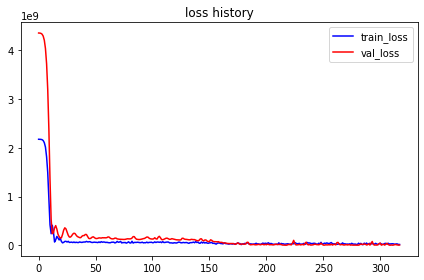

4/4 [==============================] - 0s 491us/step


In [301]:
"""
Predict the global spread of coronavirus with Dense modle
"""
pdm_reg = PandemicRegressor(window_size=WINDOW_SIZE, hidden_state=False, batch_size=8, n_feature=3, model_name='world_dense_pdm_reg', stateful=False)

hist = pdm_reg.fit(X_train=X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2]), 
                   y_train=y_train, 
                   validation_data=(X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2]), y_test),
                   verbose=1,
                   epochs=3000)
show_train_hist(hist)

pdm_reg.load_best_weights()
loss_and_metrics = pdm_reg.evaluate(X_test=X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2]), y_test=y_test)

In [302]:
print(f'MAE: {loss_and_metrics[1]}, MAPE: {loss_and_metrics[2]}')
print('===================================================== Prediction of X_test =====================================================')
y_hat = pdm_reg.predict(X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2]))
y_dict = {'Confirmed': [x[0] for x in y_hat],
          'Deaths':[x[1] for x in y_hat],
          'Recovered':[x[2] for x in y_hat]}
y_df = pd.DataFrame(y_dict)
y_df

MAE: 1414.038818359375, MAPE: 2.935166358947754
===================================================== Prediction of X_test =====================================================


,Confirmed,Deaths,Recovered
0,94488.578,3240.762,47568.273
1,97776.977,3367.244,49622.102
2,101638.469,3510.123,51895.180
3,105780.758,3661.692,54286.496


In [303]:
from datetime import timedelta

date_index = world_daily_df['ObservationDate'] + timedelta(days=n)
date_index[:n]

pd.set_option('display.float_format', lambda x: '%.3f' % x)
n = 7
print(f'\n=============================================== World Prediction of {n} days =====================================================')
prediction = pdm_reg.predict_n_days(n, X_test[-1], {'mean': _mean, 'std': _std})
prediction = prediction.set_index(date_index[:n])
prediction


=============================================== World Prediction of 7 days =====================================================


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-14,138340.594,4822.165,72058.859
2020-03-13,131449.672,4579.724,68399.102
2020-03-12,124951.266,4350.573,64931.473
2020-03-11,119379.109,4152.637,61912.098
2020-03-10,114307.625,3971.097,59119.691
2020-03-09,109861.344,3810.242,56617.797
2020-03-08,105780.758,3661.693,54286.512


In [304]:
prediction.to_csv(os.path.join(res_dir, f'world_{n}days_prediction.csv'))

In [305]:
print(df['Country/Region'].unique())
nation_name = 'South Korea'

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia

In [306]:
korea_df = df[df['Country/Region'] == nation_name].groupby('ObservationDate')['Confirmed', 'Deaths', 'Recovered'].sum()
korea_df = korea_df.reset_index()
korea_df = korea_df.sort_values('ObservationDate', ascending=False)
korea_df.style.background_gradient(cmap='Pastel1')

,ObservationDate,Confirmed,Deaths,Recovered
45,2020-03-07 00:00:00,7041,44,135
44,2020-03-06 00:00:00,6593,42,135
43,2020-03-05 00:00:00,6088,35,41
42,2020-03-04 00:00:00,5621,35,41
41,2020-03-03 00:00:00,5186,28,30
40,2020-03-02 00:00:00,4335,28,30
39,2020-03-01 00:00:00,3736,17,30
38,2020-02-29 00:00:00,3150,16,27
37,2020-02-28 00:00:00,2337,13,22
36,2020-02-27 00:00:00,1766,13,22


In [307]:
# for nation_name in df['Country/Region'].unique():
print(f'[{nation_name} spread of coronavirus19]')
_mean = np.mean(korea_df[['Confirmed', 'Deaths', 'Recovered']].values, axis=0)
_std = np.std(korea_df[['Confirmed', 'Deaths', 'Recovered']].values, axis=0)
    
X, y = seq2dataset(korea_df[['Confirmed', 'Deaths', 'Recovered']].values, WINDOW_SIZE)
X = (X - _mean) / _std
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)

[South Korea spread of coronavirus19]


C:\Users\codez\PycharmProjects\CoronavirusDisease2019\model\2020-03-08;22.02.52\korea_dense_pdm_reg.best.hdf5
Train on 22 samples, validate on 4 samples
Epoch 1/3000
22/22 [==============================] - 1s 31ms/step - loss: 1241547.9591 - mae: 389.3064 - mape: 40399984.0000 - val_loss: 13464092.0000 - val_mae: 2153.0171 - val_mape: 99.8412
Epoch 2/3000
22/22 [==============================] - 0s 3ms/step - loss: 1236407.8914 - mae: 387.2197 - mape: 63212496.0000 - val_loss: 13406853.0000 - val_mae: 2147.8931 - val_mape: 98.2961
Epoch 3/3000
22/22 [==============================] - 0s 4ms/step - loss: 1218585.2347 - mae: 380.1565 - mape: 379510528.0000 - val_loss: 13234228.0000 - val_mae: 2131.1624 - val_mape: 91.4064
Epoch 4/3000
22/22 [==============================] - 0s 4ms/step - loss: 1167297.7383 - mae: 370.3537 - mape: 834511808.0000 - val_loss: 12813052.0000 - val_mae: 2088.6904 - val_mape: 72.8629
Epoch 5/3000
22/22 [==============================] - 0s 4ms/step - loss: 10

22/22 [==============================] - 0s 4ms/step - loss: 35237.1174 - mae: 85.2523 - mape: 71544936.0000 - val_loss: 584513.5625 - val_mae: 433.4540 - val_mape: 192.9435
Epoch 87/3000
22/22 [==============================] - 0s 4ms/step - loss: 22745.4785 - mae: 82.2265 - mape: 129481400.0000 - val_loss: 563464.9375 - val_mae: 398.0012 - val_mape: 150.3769
Epoch 88/3000
22/22 [==============================] - 0s 4ms/step - loss: 10300.5489 - mae: 56.2043 - mape: 125366752.0000 - val_loss: 965505.0000 - val_mae: 518.6007 - val_mape: 90.6319
Epoch 89/3000
22/22 [==============================] - 0s 4ms/step - loss: 21342.2995 - mae: 68.5963 - mape: 173266944.0000 - val_loss: 1469734.3750 - val_mae: 673.2604 - val_mape: 116.7782
Epoch 90/3000
22/22 [==============================] - 0s 4ms/step - loss: 43287.7012 - mae: 96.9496 - mape: 260315376.0000 - val_loss: 1108971.8750 - val_mae: 596.8870 - val_mape: 167.2944
Epoch 91/3000
22/22 [==============================] - 0s 4ms/step - 

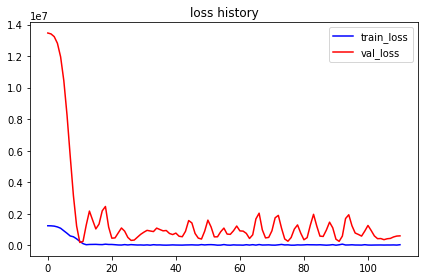

4/4 [==============================] - 0s 499us/step


In [308]:
"""
Predict the korea spread of coronavirus with Dense modle
"""
k_pdm_reg = PandemicRegressor(window_size=WINDOW_SIZE, hidden_state=False, batch_size=8, n_feature=3, model_name='korea_dense_pdm_reg', stateful=False)

hist = k_pdm_reg.fit(X_train=X_train.reshape(len(X_train), X_train.shape[1] * X_train.shape[2]), 
                   y_train=y_train, 
                   validation_data=(X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2]), y_test),
                   verbose=1,
                   epochs=3000)
show_train_hist(hist)
k_pdm_reg.load_best_weights()
loss_and_metrics = k_pdm_reg.evaluate(X_test=X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2]), y_test=y_test)

In [309]:
print(f'MAE: {loss_and_metrics[1]}, MAPE: {loss_and_metrics[2]}')
print('===================================================== Prediction of X_test =====================================================')
y_hat = k_pdm_reg.predict(X_test.reshape(len(X_test), X_test.shape[1] * X_test.shape[2]))
y_dict = {'Confirmed': [x[0] for x in y_hat],
          'Deaths':[x[1] for x in y_hat],
          'Recovered':[x[2] for x in y_hat]}
y_df = pd.DataFrame(y_dict)
y_df

MAE: 527.4658203125, MAPE: 22.470951080322266
===================================================== Prediction of X_test =====================================================


,Confirmed,Deaths,Recovered
0,6203.419,28.026,37.093
1,7228.078,32.653,43.205
2,8122.553,36.778,48.486
3,9934.715,44.930,59.276


In [310]:
from datetime import timedelta

date_index = korea_df['ObservationDate'] + timedelta(days=n)
date_index[:n]

pd.set_option('display.float_format', lambda x: '%.3f' % x)
n = 7
print(f'\n============================================{nation_name} Prediction of {n} days =====================================================')
prediction = k_pdm_reg.predict_n_days(n, X_test[-1], {'mean': _mean, 'std': _std})
prediction = prediction.set_index(date_index[:n])
prediction


============================================South Korea Prediction of 7 days =====================================================


,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-03-14,22608.445,102.108,134.982
2020-03-13,19917.730,90.115,118.972
2020-03-12,17476.449,78.968,104.277
2020-03-11,15355.057,69.358,91.379
2020-03-10,13303.690,60.005,79.341
2020-03-09,11484.751,51.905,68.507
2020-03-08,9934.716,44.930,59.276


In [311]:
prediction.to_csv(os.path.join(res_dir, f'korea_{n}days_prediction.csv'), index=True)